In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms has 207 missing values, which is ~1% of the data, we might try median imputation or drop the values

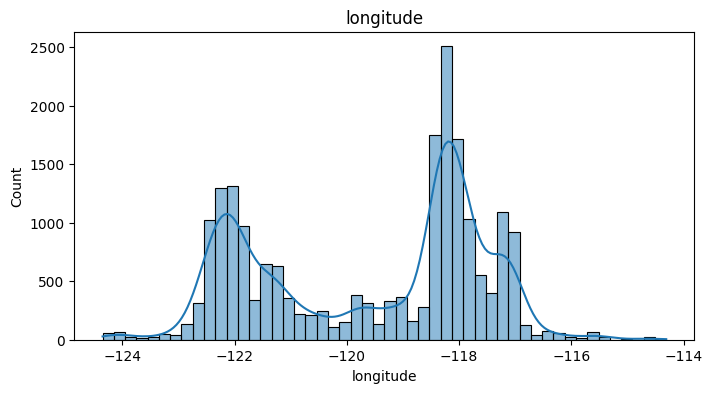

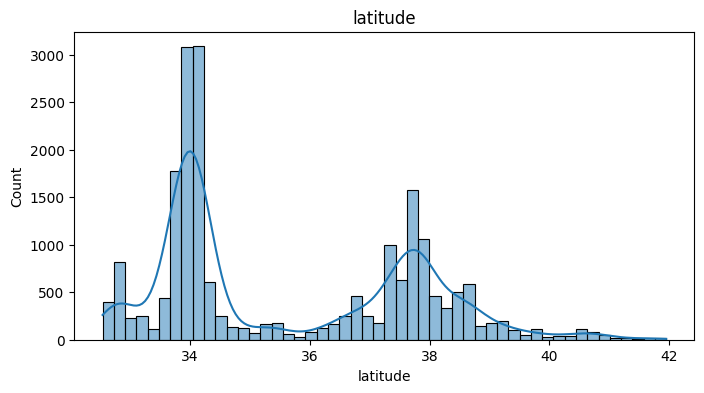

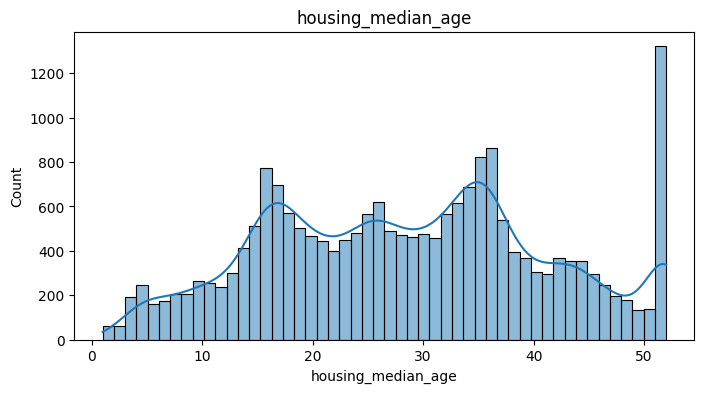

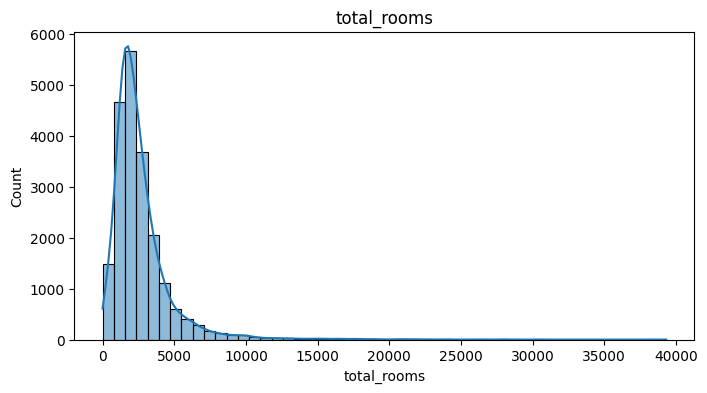

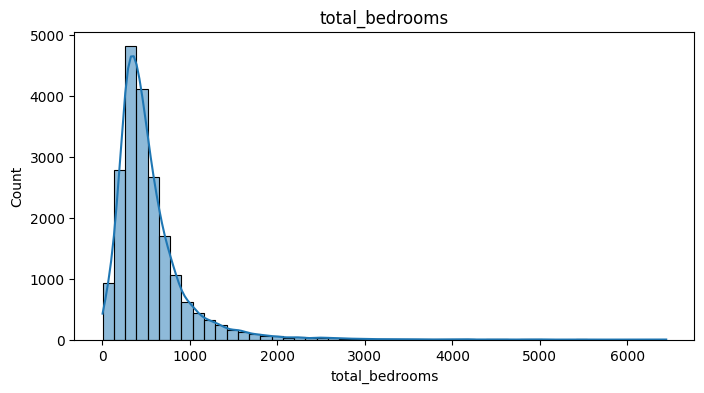

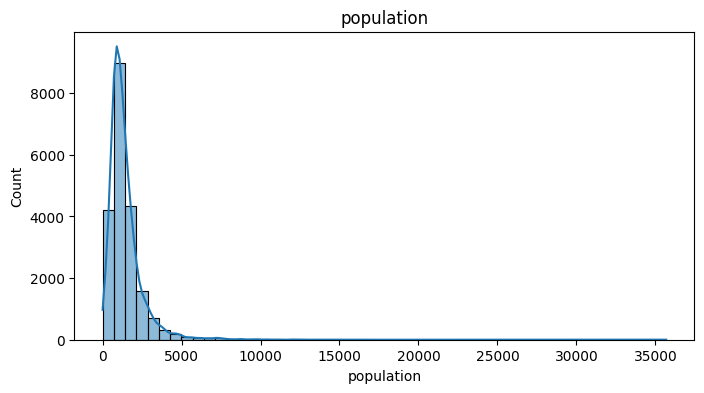

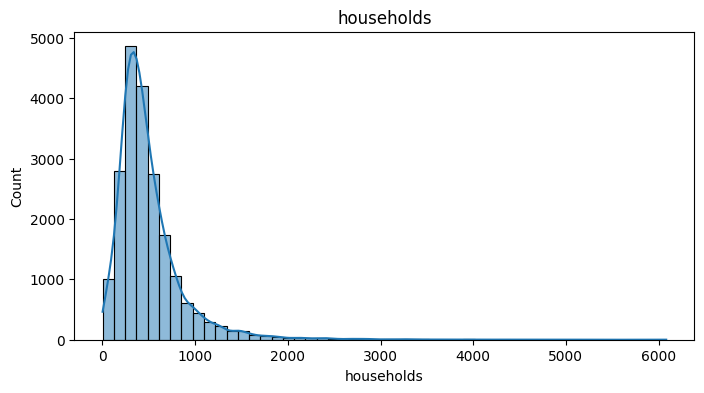

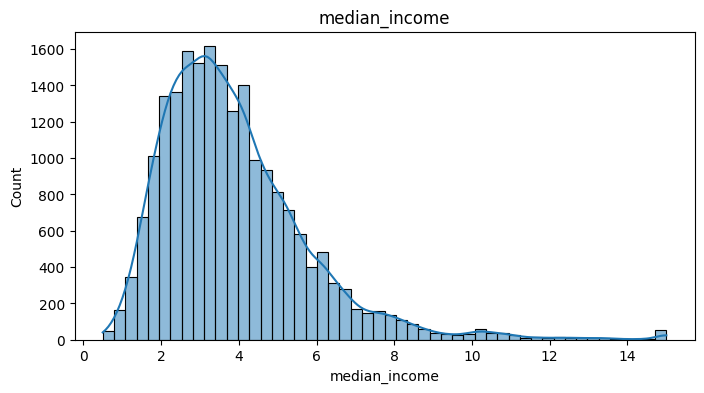

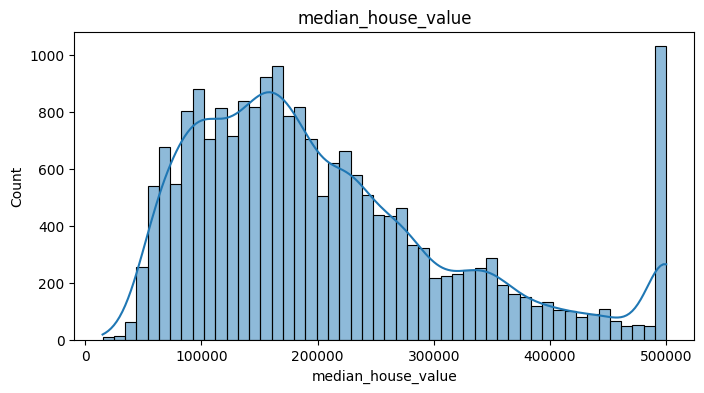

In [6]:
import seaborn as sns

for column in housing.select_dtypes(include=['float64', 'int']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(housing[column], kde=True, bins=50)
    plt.title(column)
    plt.show()


In [7]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)

Since total_bedrooms is heavily scewed, it is better to implement median imputation

Text(0, 0.5, 'Latitude')

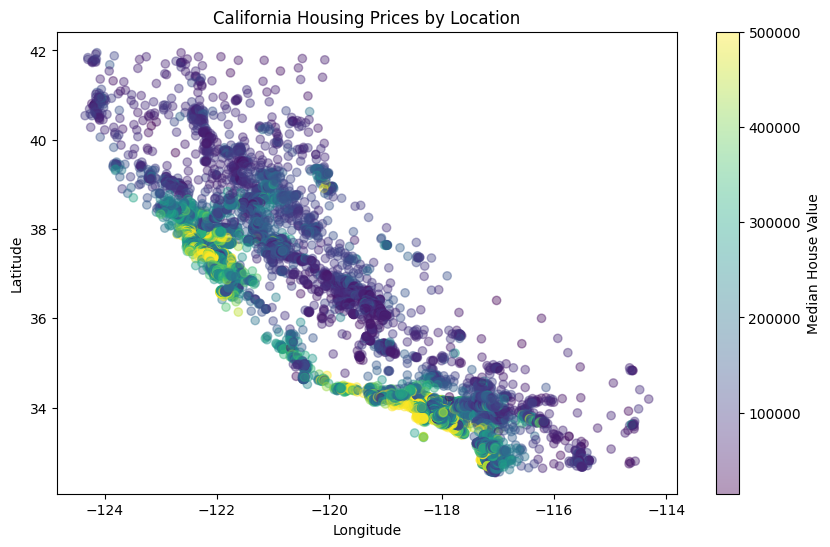

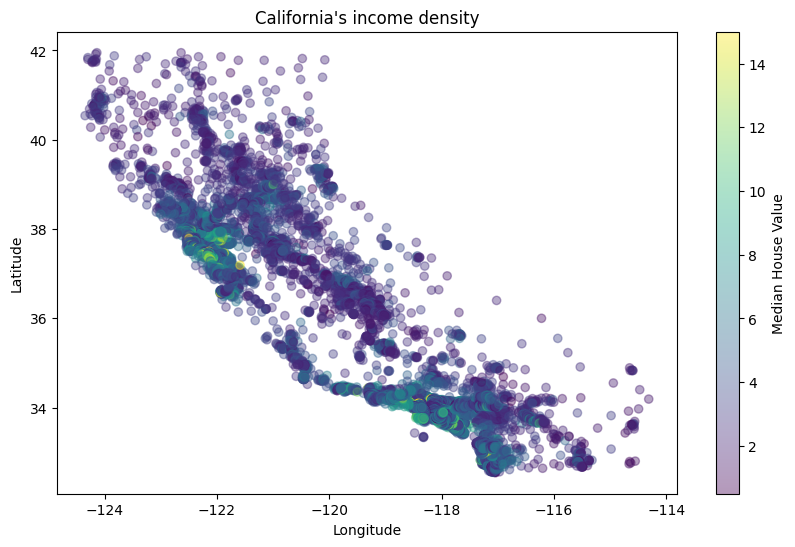

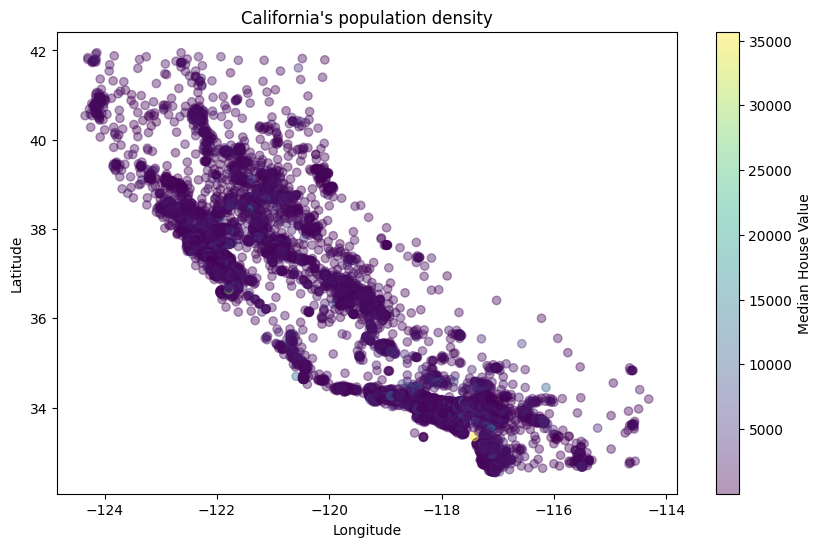

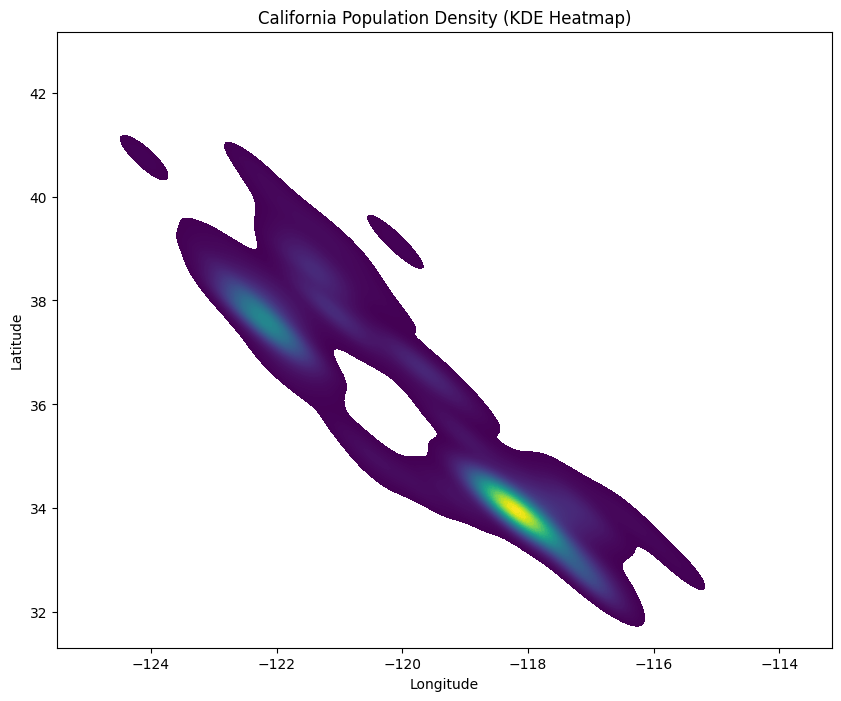

In [8]:
#housing prices distribution
plt.figure(figsize=(10,6))
plt.scatter(housing['longitude'], housing['latitude'],
            alpha=0.4, c=housing['median_house_value'])
plt.colorbar(label='Median House Value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")

#income distribution
plt.figure(figsize=(10,6))
plt.scatter(housing['longitude'], housing['latitude'],
            alpha=0.4, c=housing['median_income'])
plt.colorbar(label='Median House Value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California's income density")

#population distribution
plt.figure(figsize=(10,6))
plt.scatter(housing['longitude'], housing['latitude'],
            alpha=0.4, c=housing['population'])
plt.colorbar(label='Median House Value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California's population density")

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=housing['longitude'], 
    y=housing['latitude'],
    cmap="viridis", 
    fill=True, 
    thresh=0.05, 
    levels=100
)
plt.title("California Population Density (KDE Heatmap)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

The graphs and heatmap indicates that creating custom regions based on longtitude and latitude might help explain the irregular peaks in values like housing_median_age and median_house_value

In [9]:
skewed_features = ['total_rooms', 'total_bedrooms', 'population', 'households']
for col in skewed_features:
    housing['log_' + col] = np.log1p(housing[col])

correlations = housing.corr(numeric_only=True)['median_house_value']

# Sort and display
correlations = correlations.sort_values(ascending=False)
print(correlations)

median_house_value    1.000000
median_income         0.688075
log_total_rooms       0.159422
total_rooms           0.134153
housing_median_age    0.105623
log_households        0.073612
households            0.065843
log_total_bedrooms    0.053059
total_bedrooms        0.049457
log_population       -0.021205
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


For skewed features, we can either do capping or do log transformation to improve correlation value, we can see that this method improves the correlations slightly

In [10]:
# Rooms per household
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

# Bedrooms per room (indicates house density)
housing['room_per_bedroom'] = housing['total_rooms'] /  housing['total_bedrooms'] 

# Population per household
housing['population_per_household'] = housing['population'] / housing['households']

correlations = housing.corr(numeric_only=True)['median_house_value']

# Sort and display
correlations = correlations.sort_values(ascending=False)
print(correlations)

median_house_value          1.000000
median_income               0.688075
room_per_bedroom            0.367217
log_total_rooms             0.159422
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
log_households              0.073612
households                  0.065843
log_total_bedrooms          0.053059
total_bedrooms              0.049457
log_population             -0.021205
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64


For feature engineering, we try to explore different relations by trying to create features by our own, room_per_bedroom works better than bedroom_per_room, so we keep it 

In [11]:
from sklearn.cluster import KMeans

# Choosing number of regions (clusters)

coords = housing[['longitude', 'latitude']]
kmeans = KMeans(n_clusters=8, random_state=42)
housing['region'] = kmeans.fit_predict(coords)

Explain KMeans here bc

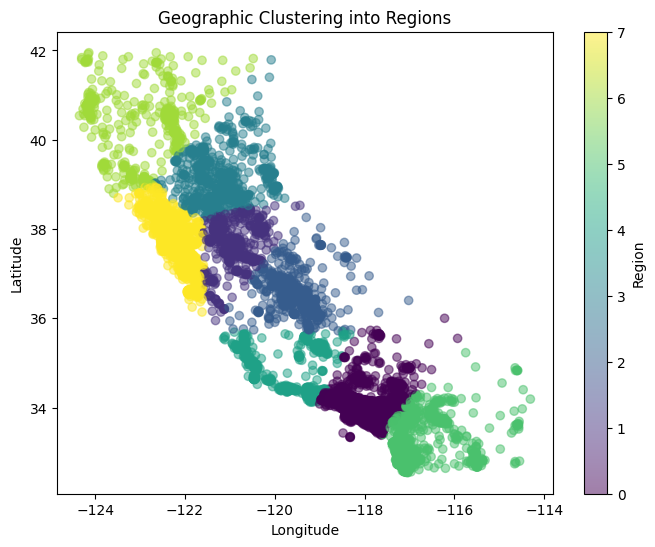

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['region'], alpha=0.5)
plt.title('Geographic Clustering into Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Region')

In [13]:
#one-hot encoding region and ocean proximity
housing = pd.get_dummies(housing, columns=['region'], prefix='region')
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

Do one-hot enconding for both regions and ocean_proximity

In [14]:
correlations = housing.corr(numeric_only=True)['median_house_value']

# Sort and display
correlations = correlations.sort_values(ascending=False)
print(correlations)

median_house_value            1.000000
median_income                 0.688075
room_per_bedroom              0.367217
region_7                      0.268645
ocean_proximity_<1H OCEAN     0.256617
region_0                      0.167698
ocean_proximity_NEAR BAY      0.160284
log_total_rooms               0.159422
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
log_households                0.073612
households                    0.065843
log_total_bedrooms            0.053059
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
log_population               -0.021205
population_per_household     -0.023737
region_4                     -0.024511
population                   -0.024650
longitude                    -0.045967
region_5                     -0.087334
latitude                     -0.144160
region_6                     -0.161541
region_1                 

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   log_total_rooms             20640 non-null  float64
 10  log_total_bedrooms          20640 non-null  float64
 11  log_population              20640 non-null  float64
 12  log_households              20640 non-null  float64
 13  rooms_per_household         206

In [16]:
new_threshold = 10
mid_old_threshold = 30

# Categorize age in one line
conditions = [
    housing['housing_median_age'] <= new_threshold,
    housing['housing_median_age'] <= mid_old_threshold
]
choices = ['new', 'mid_old']
housing['age_category'] = np.select(conditions, choices, default='very_old')

# One-hot encode
housing = pd.get_dummies(housing, columns=['age_category'], prefix='age')

Creating age categories to deal with capping of 52

In [17]:
cols_to_drop = [
    'total_rooms',
    'log_households',
    'households',
    'log_total_bedrooms',
    'total_bedrooms',
    'log_population',
    'population_per_household',
    'population',
    'longitude',
    'latitude',
]

housing.drop(columns=cols_to_drop, inplace=True)

These features show very low correlation, so imma drop it

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   log_total_rooms             20640 non-null  float64
 4   rooms_per_household         20640 non-null  float64
 5   room_per_bedroom            20640 non-null  float64
 6   region_0                    20640 non-null  bool   
 7   region_1                    20640 non-null  bool   
 8   region_2                    20640 non-null  bool   
 9   region_3                    20640 non-null  bool   
 10  region_4                    20640 non-null  bool   
 11  region_5                    20640 non-null  bool   
 12  region_6                    20640 non-null  bool   
 13  region_7                    206

In [19]:
correlations = housing.corr(numeric_only=True)['median_house_value']

# Sort and display
correlations = correlations.sort_values(ascending=False)
print(correlations)

median_house_value            1.000000
median_income                 0.688075
room_per_bedroom              0.367217
region_7                      0.268645
ocean_proximity_<1H OCEAN     0.256617
region_0                      0.167698
ocean_proximity_NEAR BAY      0.160284
log_total_rooms               0.159422
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
age_very_old                  0.071313
ocean_proximity_ISLAND        0.023416
age_new                      -0.016387
region_4                     -0.024511
age_mid_old                  -0.062562
region_5                     -0.087334
region_6                     -0.161541
region_1                     -0.163738
region_3                     -0.195995
region_2                     -0.241299
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


some features might need scaling for model to work better, so will be implementing standardizations

In [20]:
housing.describe()

,housing_median_age,median_income,median_house_value,log_total_rooms,rooms_per_household,room_per_bedroom
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,206855.816909,7.629377,5.429000,4.993917
std,12.585558,1.899822,115395.615874,0.749991,2.474173,1.239235
min,1.000000,0.499900,14999.000000,1.098612,0.846154,0.354023
25%,18.000000,2.563400,119600.000000,7.278456,4.440716,4.164476
50%,29.000000,3.534800,179700.000000,7.662938,5.229129,4.922250
75%,37.000000,4.743250,264725.000000,8.054840,6.052381,5.706958
max,52.000000,15.000100,500001.000000,10.579514,141.909091,26.917241


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   log_total_rooms             20640 non-null  float64
 4   rooms_per_household         20640 non-null  float64
 5   room_per_bedroom            20640 non-null  float64
 6   region_0                    20640 non-null  bool   
 7   region_1                    20640 non-null  bool   
 8   region_2                    20640 non-null  bool   
 9   region_3                    20640 non-null  bool   
 10  region_4                    20640 non-null  bool   
 11  region_5                    20640 non-null  bool   
 12  region_6                    20640 non-null  bool   
 13  region_7                    206

In [22]:
housing.to_csv('california_prepared.csv')